In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [5]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
Index = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score']
categorical = ('gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course')

In [9]:
#changing to categorical 
df['gender']=df['gender'].replace(["male","female"],[1,0])
df['race/ethnicity']=df['race/ethnicity'].replace(["group A","group B","group C","group D","group E"],[1,2,3,4,5])
df['parental level of education']=df['parental level of education'].replace(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],[1,2,3,4,5,6])
df['lunch']=df['lunch'].replace(['standard', 'free/reduced'],[1,0])
df['test preparation course']=df['test preparation course'].replace(['none', 'completed'],[0,1])


In [10]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,2,1,1,0,72,72,74
1,0,3,2,1,1,69,90,88
2,0,2,3,1,0,90,95,93
3,1,1,4,0,0,47,57,44
4,1,3,2,1,0,76,78,75
...,...,...,...,...,...,...,...,...
995,0,5,3,1,1,88,99,95
996,1,3,5,0,0,62,55,55
997,0,3,5,0,1,59,71,65
998,0,4,2,1,1,68,78,77


In [11]:
x = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course', 'math score', 'reading score']]
y = df['writing score']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 10)

In [14]:
mlr_model = LinearRegression()

In [17]:
mlr_model.fit(x_train,y_train)

LinearRegression()

In [18]:
model = mlr_model.predict(x_test)
# model

In [19]:
evaluate_model = mlr_model.predict([[0,2,1,1,0,72,72]])

In [20]:
accuracy = mlr_model.score(x_test,y_test)
print("accuracy of the model:",accuracy)

accuracy of the model: 0.9470305546200135


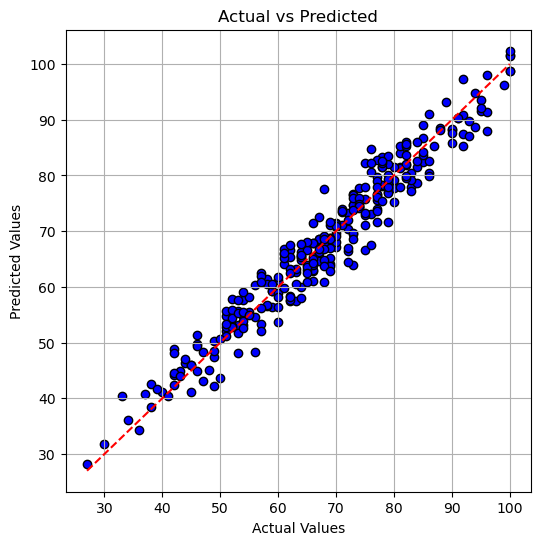

In [21]:
plt.figure(figsize=(6, 6))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.scatter(y_test, model, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # y=x line
plt.grid(True)
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [23]:
print("------------------------------------------")
print("Actual Value For Given Feature:",y[0])
print("Predicted Value:",evaluate_model)
print("------------------------------------------\n")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, model))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, model))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, model, squared=False))
print("R² Score/Accuracy:", r2_score(y_test, model))

------------------------------------------
Actual Value For Given Feature: 74
Predicted Value: [74.38877101]
------------------------------------------

Mean Absolute Error (MAE): 2.7507278832326985
Mean Squared Error (MSE): 11.669790325370137
Root Mean Squared Error (RMSE): 3.416107481530717
R² Score/Accuracy: 0.9470305546200135
